<a href="https://www.kaggle.com/sadiqueabdullah/wids-datathon2022?scriptVersionId=85599555" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv
/kaggle/input/eui-image/eui image.png


**Background**
Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use.

According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.

**Overview: the dataset and challenge**
The WiDS Datathon dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab). WiDS Datathon participants will analyze differences in building energy efficiency, creating models to predict building energy consumption. Participants will use a dataset consisting of variables that describe building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions.

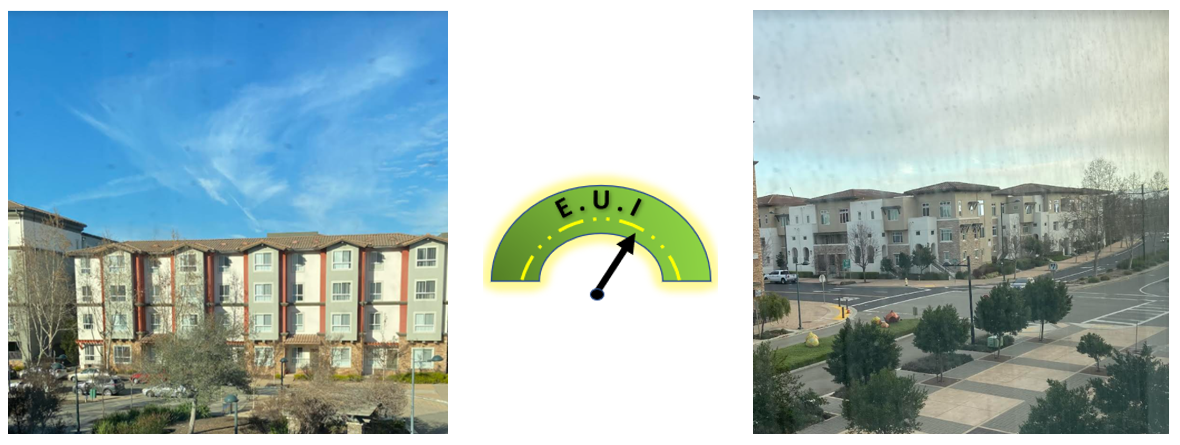

In [2]:
from IPython.display import Image
import os
("../input/eui-image/eui image.png")
Image("../input/eui-image/eui image.png")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [4]:
#Reading the Training data

train_eui = pd.read_csv('../input/widsdatathon2022/train.csv')
train_eui.head(10)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
5,1,State_1,Commercial,Warehouse_Selfstorage,119900.0,1956.0,NaN,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,6.597715,5
6,1,State_1,Commercial,Warehouse_Nonrefrigerated,91367.0,1982.0,56.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,12.817841,6
7,1,State_1,Commercial,Warehouse_Nonrefrigerated,50422.0,1947.0,99.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,22.392014,7
8,1,State_1,Commercial,Office_Uncategorized,122020.0,1929.0,98.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,28.199578,8
9,1,State_1,Commercial,Office_Uncategorized,102612.0,1979.0,83.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,29.515952,9


In [5]:
train_eui.shape

(75757, 64)

In [6]:
train_eui.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [7]:
train_eui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [8]:
# Checking the similarity between columns 'direction_max_wind_speed'& 'max_wind_speed'
print((~train_eui.duplicated(subset=['direction_max_wind_speed','max_wind_speed'])).sum())


23


In [9]:
# Checking the similarity between columns 'direction_max_wind_speed'& 'max_wind_speed'
print((~train_eui.duplicated(subset=['direction_peak_wind_speed','max_wind_speed'])).sum())

23


In [10]:
# Checking the similarity between columns 'direction_max_wind_speed'& 'max_wind_speed'
print((~train_eui.duplicated(subset=['direction_max_wind_speed','direction_peak_wind_speed'])).sum())

21


In [11]:
train_eui['Year_Factor'].unique()

array([1, 2, 3, 4, 5, 6])

<AxesSubplot:>

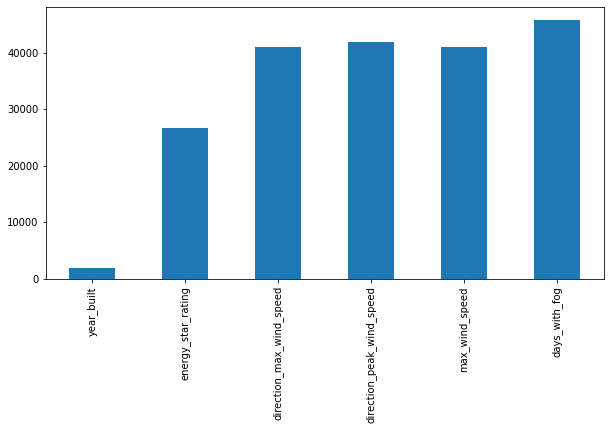

In [12]:
# Plotting the columns with null entries
plt.figure(figsize= (10,5))
train_eui.isna().sum()[train_eui.isna().sum()>0].plot(kind='bar')

In [13]:
train_eui.isnull().sum().sort_values(ascending=False)


days_with_fog                45796
direction_peak_wind_speed    41811
max_wind_speed               41082
direction_max_wind_speed     41082
energy_star_rating           26709
                             ...  
july_avg_temp                    0
july_max_temp                    0
august_min_temp                  0
august_avg_temp                  0
id                               0
Length: 64, dtype: int64

<AxesSubplot:>

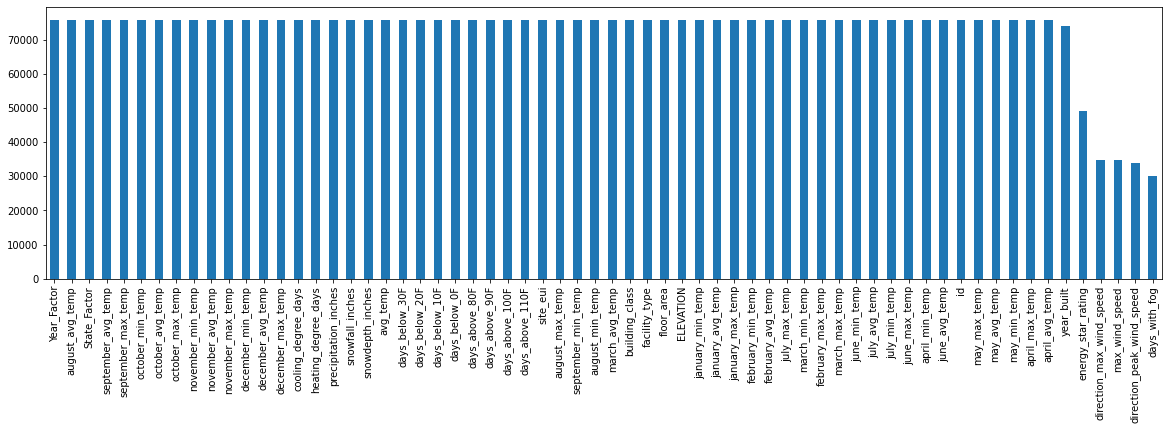

In [14]:
#Count plot for dataset
plt.figure(figsize= (20,5))
count=train_eui.count().sort_values(ascending=False)
count.plot(kind='bar')

In [15]:
#Checking the EUI column
train_eui['site_eui'].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

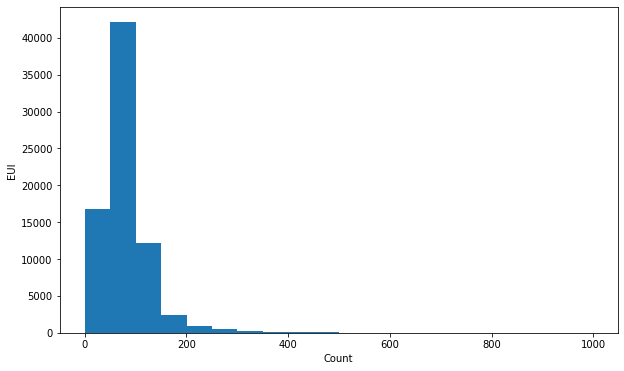

In [16]:
plt.figure(figsize=(10,6))
plt.xlabel('Count')
plt.ylabel('EUI')
plt.hist(train_eui['site_eui'], bins = 20)
plt.show()

In [17]:
train_eui.shape
#data_eui['max_wind_speed'].describe()

(75757, 64)

In [18]:
train_eui['days_above_100F'].describe()

count    75757.000000
mean         0.279539
std          2.252323
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        119.000000
Name: days_above_100F, dtype: float64

In [19]:
#Function for creating the dummy values for Object value columns which seems to be important

def assign_dummies(df, cat_cols, dummy_na):
    for col in cat_cols:
        try:
            df=pd.concat([df.drop(col,axis=1),
                          pd.get_dummies(df[col],
                                         prefix=col,
                                         prefix_sep='_',
                                         drop_first=True,
                                         dummy_na=dummy_na)],
                         axis=1)
        except:
            continue
    return df 

In [20]:
# Select the columns for dummy conversions
cat_cols = train_eui[['State_Factor', 'building_class', 'facility_type']]
data_eui1=assign_dummies(train_eui, cat_cols, dummy_na = True)
data_eui1.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized,facility_type_nan
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.0
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,0.000977,0.000119,0.000898,0.001822,0.007973,0.016566,0.001492,0.007616,0.004356,0.0
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,0.031239,0.010899,0.029947,0.042642,0.088935,0.127640,0.038593,0.086940,0.065857,0.0
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [21]:
data_eui1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Columns: 130 entries, Year_Factor to facility_type_nan
dtypes: float64(24), int64(37), uint8(69)
memory usage: 40.2 MB


In [22]:
# finding the top 15 factors contributing to eui value
iv = abs(data_eui1.corr())
cor_sort = iv.sort_values(by = 'site_eui', ascending = False)
cor_sort=cor_sort['site_eui'][:15,]
cor_sort

site_eui                                      1.000000
energy_star_rating                            0.511012
facility_type_Grocery_store_or_food_market    0.209918
facility_type_Health_Care_Inpatient           0.209634
january_min_temp                              0.179190
january_avg_temp                              0.167982
facility_type_Laboratory                      0.159372
snowfall_inches                               0.157284
february_avg_temp                             0.154071
State_Factor_State_11                         0.149263
heating_degree_days                           0.147861
february_min_temp                             0.147348
days_below_30F                                0.139811
march_avg_temp                                0.135303
march_min_temp                                0.134110
Name: site_eui, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

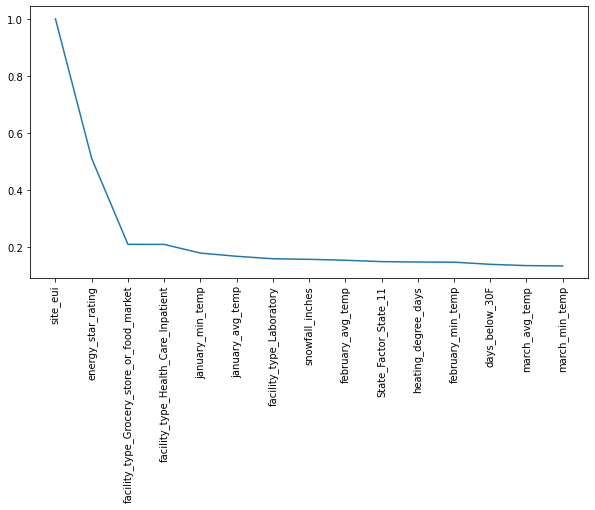

In [23]:
plt.figure(figsize=(10,5))
ax = plt.plot(cor_sort)
plt.xticks(rotation=90)

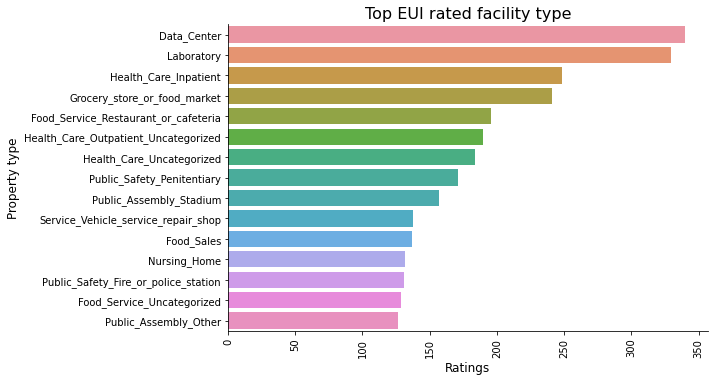

In [24]:
#plotting the top rated eui facility type
plot_order = (train_eui.groupby('facility_type')['site_eui'].mean().sort_values(ascending=False).index.values)[:15,]
g=sns.catplot(y='facility_type',x= 'site_eui', data= train_eui,aspect=2, kind='bar',ci=None, legend_out=False, order=plot_order)#increase aspect=XX in code to increase spacing between the bars 
plt.title('Top EUI rated facility type', fontsize= 16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Property type', fontsize=12)
plt.xticks(rotation=90)

plt.show()


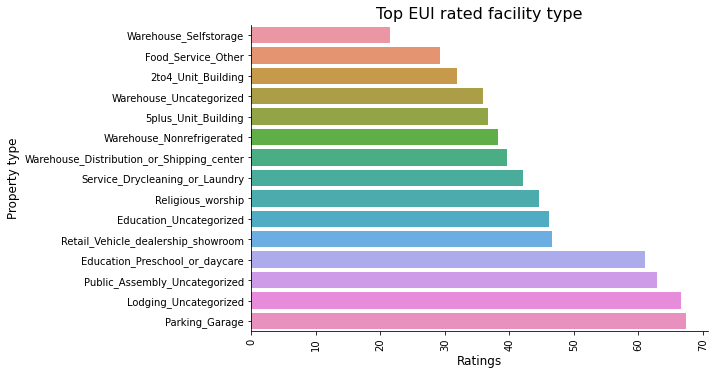

In [25]:
#plotting the worst rated eui facility type
plot_order = (train_eui.groupby('facility_type')['site_eui'].mean().sort_values(ascending=True).index.values)[:15,]
g=sns.catplot(y='facility_type',x= 'site_eui', data= train_eui,aspect=2, kind='bar',ci=None, legend_out=False, order=plot_order)#increase aspect=XX in code to increase spacing between the bars 
plt.title('Top EUI rated facility type', fontsize= 16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Property type', fontsize=12)
plt.xticks(rotation=90)

plt.show()

In [26]:
train_eui['Year_Factor'].describe()

count    75757.000000
mean         4.367755
std          1.471441
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Year_Factor, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

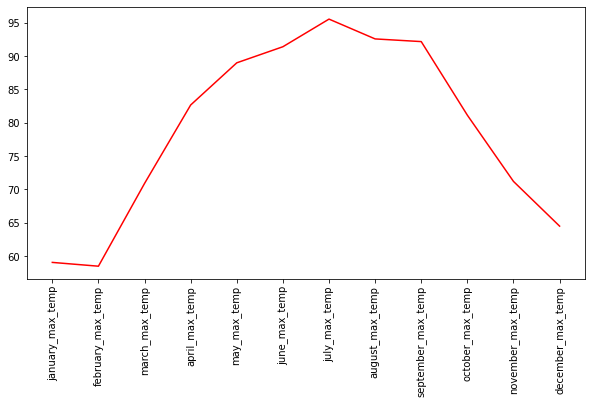

In [27]:
# plotting the month-wise temperature variation
plt.figure(figsize=(10,5))
max_temp_monthly = train_eui[['january_max_temp','february_max_temp','march_max_temp', 'april_max_temp', 'may_max_temp', 'june_max_temp', 'july_max_temp','august_max_temp','september_max_temp', 'october_max_temp', 'november_max_temp','december_max_temp']]
min_temp_monthly = train_eui[['january_min_temp','february_min_temp','march_min_temp', 'april_min_temp', 'may_min_temp', 'june_min_temp', 'july_min_temp','august_min_temp','september_min_temp', 'october_min_temp', 'november_min_temp','december_min_temp']]
avg_temp_monthly = train_eui[['january_avg_temp','february_avg_temp','march_avg_temp', 'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp','august_avg_temp','september_avg_temp', 'october_avg_temp', 'november_avg_temp','december_avg_temp']]

plt.plot(max_temp_monthly.mean(),  c='red')
plt.xticks(rotation = 90)

# **Data Cleaning**

There are three identical coulmns in the data which needs to be fixed by dropping the two columns

In [28]:
train_data= train_eui.drop(['direction_peak_wind_speed','direction_max_wind_speed'], axis=1)

There are Null/NaN values in few columns which needs to be replaced suitably

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           75757 non-null  int64  
 1   State_Factor          75757 non-null  object 
 2   building_class        75757 non-null  object 
 3   facility_type         75757 non-null  object 
 4   floor_area            75757 non-null  float64
 5   year_built            73920 non-null  float64
 6   energy_star_rating    49048 non-null  float64
 7   ELEVATION             75757 non-null  float64
 8   january_min_temp      75757 non-null  int64  
 9   january_avg_temp      75757 non-null  float64
 10  january_max_temp      75757 non-null  int64  
 11  february_min_temp     75757 non-null  int64  
 12  february_avg_temp     75757 non-null  float64
 13  february_max_temp     75757 non-null  int64  
 14  march_min_temp        75757 non-null  int64  
 15  march_avg_temp     

# Imputing the suitable values for 'max_wind_speed' Column

In [30]:
# Imputing the suitable values for 'max_wind_speed' Column
train_data['max_wind_speed'].isna().sum()

41082

In [31]:
train_data['max_wind_speed'].describe()

count    34675.000000
mean         4.190601
std          6.458789
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         23.300000
Name: max_wind_speed, dtype: float64

In [32]:
# finding the corelation of 'max_wind_speed' with other columns
ib = abs(train_data.corr())
ib_sort= ib.sort_values(by= 'max_wind_speed', ascending = False)
ib_sort['max_wind_speed'][:5,]


max_wind_speed       1.000000
february_max_temp    0.786651
february_avg_temp    0.694419
december_avg_temp    0.687704
december_max_temp    0.687029
Name: max_wind_speed, dtype: float64

Text(0, 0.5, 'No. of data')

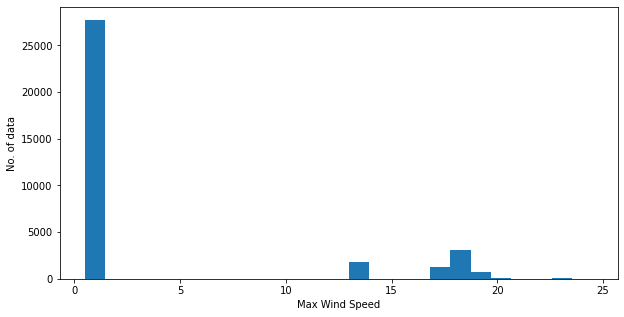

In [33]:
plt.figure(figsize = (10,5))
plt.hist(train_data['max_wind_speed'], range=[.5, 24.5], bins =25)
plt.xlabel('Max Wind Speed')
plt.ylabel('No. of data')

In [34]:
train_data['max_wind_speed'] = train_data['max_wind_speed'].fillna(train_data.groupby('State_Factor')['max_wind_speed'].transform('mean'))
train_data['max_wind_speed'].describe()               


count    75757.000000
mean         4.178604
std          5.070339
min          1.000000
25%          1.000000
50%          1.000000
75%          4.055997
max         23.300000
Name: max_wind_speed, dtype: float64

# Imputing missing values for 'days_with_fog' Column

In [35]:
train_data['days_with_fog'].describe()

count    29961.000000
mean       109.142051
std         50.699751
min         12.000000
25%         88.000000
50%        104.000000
75%        131.000000
max        311.000000
Name: days_with_fog, dtype: float64

In [36]:
fg = abs(train_data.corr())
fg_sort= fg.sort_values(by= 'days_with_fog', ascending = False)
fg_sort['days_with_fog'][:5,]

days_with_fog    1.000000
Year_Factor      0.619227
june_min_temp    0.567691
july_max_temp    0.559546
ELEVATION        0.495345
Name: days_with_fog, dtype: float64

In [37]:
train_data['days_with_fog'] = train_data['days_with_fog'].fillna(train_data.groupby('june_min_temp')['days_with_fog'].transform('mean'))
train_data['days_with_fog'] = train_data['days_with_fog'].fillna(train_data['days_with_fog'].mean())
train_data['days_with_fog'].describe()

count    75757.000000
mean       109.199998
std         45.629119
min         12.000000
25%         88.696352
50%        106.000000
75%        131.000000
max        311.000000
Name: days_with_fog, dtype: float64

# Imputing missing values for 'year_built' Column

In [38]:
yb = abs(train_data.corr())
yb_sort = yb.sort_values(by = 'year_built', ascending = False)
yb_sort['year_built'][:5,]

year_built            1.000000
october_avg_temp      0.126027
september_min_temp    0.122823
avg_temp              0.112555
october_max_temp      0.104420
Name: year_built, dtype: float64